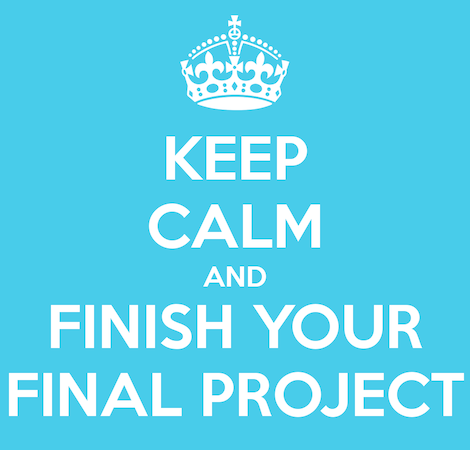

# Overview

<p style="line-height:1.75;font-size:16px">
It's time to put your skills to the test and take on a real-world data science project. You are given a dataset of ad impressions for Android users for a particular ad. Each line represents one impression for that ad and includes details such as timestamp, device, mobile carrier and more.

In [108]:
import pandas as pd

data = pd.read_csv('data/android_bids_us.csv')
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0


<p style="line-height:1.75;font-size:16px">
Your task is to predict if a user will click or not on the ad.

# Guidelines

<p style="line-height:1.75;font-size:16px">
You will have two weeks to complete this project during which we will have two half-days dedicated to this. Besides giving you the chance to gain experience and showcase what you've learned, this project is intended to give you a glimpse into the actual process and work of a data scientist.<br> Before we talk about the task itself, here are some important guidelines:<br>
1\. <b>Show your work</b> - if you've tried something and it didn't work that's fine, don't delete it. Data science is an iterative process and we can learn a lot from what didn't work. Explain what didn't work and the reasons for it.<br>
2\. <b>Explain your work</b> - don't just write a bunch of code and the final output. Explain the motivation for each step you take, describe the results you got and what they mean. <br>
3\. <b>Use visualizations</b> - while exploring the data or when trying to convey an important message, use plots to help you. That being said, don't force yourself to add plots if they're not really needed.<br>
4\. <b>Plan ahead</b> - if you start working on the project near the submission date you will have less time to ask questions and come up with ideas.<br>
5\. <b>Google is your friend</b> - while we've learned the basic skills required to complete this project, there are many other techniques and ideas we didn't have time to talk about. Don't limit yourself to the lessons, search for similar problems and how to approach them, exchange ideas with colleagues and don't be afraid to try new ideas. <br>
6\. <b>It's not about the score</b> - while reaching a good prediction score is nice, it's not the main purpose of this project. Use this project to show your understanding and reasoning as well as your technical skills.<br>
7\. <b>Write clean code</b> - make sure you write code that is easy to read and understand. Give meaningful names, use functions, add comments if needed.<br>
8\. <b>Test before submission</b> - your work should be submitted as a Jupyter Notebook. Before submitting it, make sure you run it from start to finish and verify that there are no errors.<br>
9\. <b>Enjoy it</b> - try to have fun working on this, be curious, look for interesting insights and take pride in completing a real-world project end-to-end.

# Tips

<p style="line-height:1.75;font-size:16px">
1\. Since the data is time sensitive, split it so that the test data will be the last month of data and the training data will be anything that came before that.<br>
2\. `play_apps.zip` is data from Google Play about the various apps in the dataset. You can use this to augment the impressions dataset.<br>
3\. The data is collected from customers in the US (multiple timezones).<br>

In [109]:
from zipfile import ZipFile
import pickle

app_details = ZipFile("data/play_apps.zip")
app_file = 'play_apps/com.mobilityware.CrownSolitaire'
app = pickle.loads(app_details.read(app_file))
app

{'title': 'Crown Solitaire: A New Puzzle Solitaire Card Game',
 'icon': 'https://lh3.googleusercontent.com/VbcfbcW_XD0SRApZsfmm51VgMOdlultuS_oWAgCvNc_llMP_FJhTE_wGZEd2UxqomZs',
 'screenshots': ['https://lh3.googleusercontent.com/lPVvAoy3_jWq8WpVpCRNBt3JWfVgEbruOTXx2nZNsM98iWcTw5pbO0zEHHYVRDis59mN=w720-h310-rw',
  'https://lh3.googleusercontent.com/1UVrIEfa_98aV1iiKYKC5TPjw491bKWYDI04eM7xojyLEQvLwkCWzSCsueVxzyqG_g=w720-h310-rw',
  'https://lh3.googleusercontent.com/k_IBKICl2yec-a_mG6j3e3lUQuA2CN9JntHmDrnhA2Kp0TXLZPYJzT5HuswKZI4AHtQ=w720-h310-rw',
  'https://lh3.googleusercontent.com/hhcluHaoglVr5XMrS_cvv8nhR9vPakGLch4XOxbyprpA2ukOX9oPP3w6V5os-iByFws=w720-h310-rw',
  'https://lh3.googleusercontent.com/ls51ysfbXxSz6iOM05h8Kr2d0o58tUzkf-1LOpJ9os6KfPNWddChgr8S4Ezm7SlsfCc=w720-h310-rw',
  'https://lh3.googleusercontent.com/HCab6ugOzOMOJCCI6CpoCTfWB2CLlm0f_f_XIsJcGrpiWWYJg54iMi6aEx6JZnZj2lI=w720-h310-rw',
  'https://lh3.googleusercontent.com/KLe_QWs0oeyjmelI35fZ0dHuC2RnJRHfqiGCDQRjp7-poE_xR7f

# Understanding the data

<p style="line-height:1.75;font-size:16px">
For preprocessing we should exam the following parameters -<br>
- How many rows and columns in data table<br>
- What is the columns type<br>
- What is the max\min value for every feature<br>
- Where there are missing values as NA<br>

In [110]:
data.shape

(3148828, 12)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148828 entries, 0 to 3148827
Data columns (total 12 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   bidid          object
 1   utc_time       int64 
 2   app_id         object
 3   user_state     object
 4   user_isp       object
 5   device_maker   object
 6   device_model   object
 7   device_osv     object
 8   device_height  int64 
 9   device_width   int64 
 10  marketplace    object
 11  click          int64 
dtypes: int64(4), object(8)
memory usage: 288.3+ MB


<p style="line-height:1.75;font-size:16px">
As the 'info' shown, there are many features with type 'object'.<br>
To display the integers type features we can use 'describe':

In [112]:
data.describe()

,utc_time,device_height,device_width,click
count,3.148828e+06,3.148828e+06,3.148828e+06,3.148828e+06
mean,1.538334e+12,1.180970e+03,1.152078e+03,6.770741e-02
std,2.320255e+09,5.190901e+02,4.526602e+02,2.512432e-01
min,1.533578e+12,1.400000e+01,1.400000e+01,0.000000e+00
25%,1.536460e+12,7.200000e+02,7.200000e+02,0.000000e+00
50%,1.538472e+12,1.080000e+03,1.080000e+03,0.000000e+00
75%,1.540095e+12,1.280000e+03,1.280000e+03,0.000000e+00
max,1.542630e+12,3.120000e+03,3.120000e+03,1.000000e+00


<p style="line-height:1.75;font-size:16px">
After preprocessing and retyping the features, we should run 'describe' function again.

<p style="line-height:1.75;font-size:16px">
We probably can drop columns with many missing values:

In [113]:
data.isna().sum()

bidid                 0
utc_time              0
app_id                0
user_state            0
user_isp             39
device_maker     964004
device_model     963858
device_osv            0
device_height         0
device_width          0
marketplace           0
click                 0
dtype: int64

<p style="line-height:1.75;font-size:16px">
We will test a change to fill NA values with most common value, lets verify result for 'device_maker' and 'device_model': 

In [117]:
print(data.device_maker.value_counts(dropna=False))
print('\n'+'~'*40+'\n')
print(data.device_model.value_counts(dropna=False))

NaN         964004
Samsung     863542
LG          657259
Motorola    224631
ZTE         186605
             ...  
QFX              1
Crypto           1
PCD              1
mobicel          1
Avvio            1
Name: device_maker, Length: 266, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

NaN              963858
LM-X210(G)       110596
SM-J327T1        103704
Moto E4           88164
MP260             78291
                  ...  
LGM703                1
MI 4C                 1
Z01KDA                1
Galaxy J7 Max         1
SM-G1650              1
Name: device_model, Length: 2343, dtype: int64


<AxesSubplot:xlabel='device_maker', ylabel='count'>

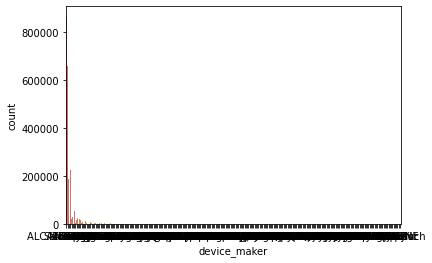

In [61]:
import seaborn as sns
sns.countplot(x='device_maker', data=data, palette='hls')

<AxesSubplot:xlabel='device_model', ylabel='count'>

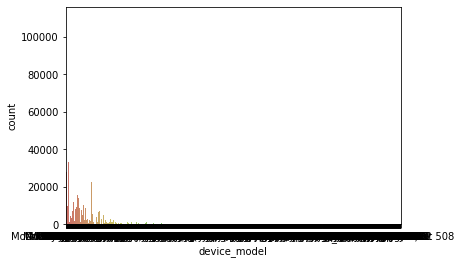

In [60]:
sns.countplot(x='device_model', data=data, palette='hls')

<p style="line-height:1.75;font-size:16px">
We can see there are many minor values apears only once or couple of times.<br>
'Samsung' is most common value by far (after na value). Before we fill all NA with value as 'Samsung', lets check how many options exist:

In [118]:
pd.unique(data.device_maker)

array([nan, 'Samsung', 'LG', 'ZTE', 'Motorola', 'Coolpad', 'HTC',
       'ALCATEL', 'Sony', 'Huawei', 'Google', 'T-Mobile',
       'ALCATEL ONE TOUCH', 'OZing', 'RCA', 'Razer', 'Asus', 'Kakatech',
       'Unimax', 'Hyundai', 'ANS', 'Lenovo', 'verykool', 'Xiaomi', 'BLU',
       'Azumi', 'LiteTEL', 'Kyocera', 'Infinix', 'Verizon', 'Sheffield',
       'Cricket', 'Nubia', 'Insignia', 'Vortex', 'FiGO', 'Oneplus',
       'iDROID', 'Vivo', 'Hisense', 'Simbans', 'Essential', 'BlackBerry',
       'LANIX', 'Smartab', 'Nextbit', 'OPPO', 'General Mobile',
       'HMD Global', 'POSH', 'Ematic', 'NuVision', 'MygPad',
       'Barnes and Noble', 'CUBOT', 'NUU Mobile', 'Unnecto', 'Unihertz',
       'LeTV', 'DoCoMo', 'nabi', 'Wiko', 'Exmobile', 'Ergo', 'Tecno',
       'DigiLand', 'AMGOO', 'NextBook', 'Advan', 'Citycall', 'vernee',
       'DOOGEE', 'TCL', 'Maxwest', 'Azpen', 'LAVA', 'Digicel', 'IVIEW',
       'Proscan', 'Sky', 'KOMU', 'Amazon', 'QMobile', 'Acer', 'Telenor',
       'M4Tel', 'Ulefone', 'Ip

<p style="line-height:1.75;font-size:16px">
Since there are many values, and most of device_maker and device_model values is NaN, Specify the NaN values as 'Samsung' will be wrong.<br>
Lets see how many 'device_maker' single values:

In [119]:
data.device_maker.value_counts().value_counts()

1       59
2       21
4       15
3       11
6       10
        ..
66       1
62       1
61       1
2614     1
54       1
Name: device_maker, Length: 106, dtype: int64

<p style="line-height:1.75;font-size:16px">
There are 59 single values, 21 duplicate value and go on.<br>
Lets try to union some values as type 'other' to simplify the data.
If we will union the values apears under 40 times we get 1332 items in category 'other'

In [120]:
data.device_maker.value_counts().loc[lambda x: x < 40].sum()

1332

<p style="line-height:1.75;font-size:16px">
Increasing these thresholds to 6000 (because union 1332 device_makers out of 2 milion lines is too little):

In [126]:
data.device_maker.value_counts().loc[lambda x: x < 6000].sum()

47362

<p style="line-height:1.75;font-size:16px">
Before we drop those columns, we can renamed all those little values as 'other':

In [132]:
data.device_maker.value_counts().loc[lambda x: x < 6000]

BLU         5083
Verizon     4612
Kakatech    4379
Kyocera     3611
Cricket     3503
            ... 
reeder         1
true           1
ECHO           1
ThL            1
iBRIT          1
Name: device_maker, Length: 251, dtype: int64

<p style="line-height:1.75;font-size:16px">
First we fill NaN values as 'other':

In [131]:
from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='other')
data['device_maker'] = imp.fit_transform(data['device_maker'].values.reshape(-1,1))


<AxesSubplot:xlabel='device_maker', ylabel='count'>

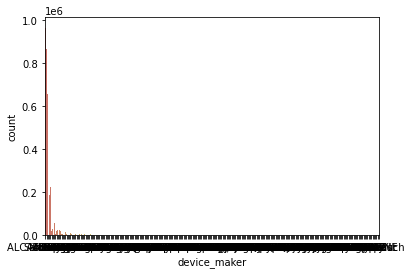

In [133]:
sns.countplot(x='device_maker', data=data, palette='hls')

In [134]:
data.loc[data['device_maker'].value_counts()[data['device_maker']].values < 6000] = 'other'

<AxesSubplot:xlabel='device_maker', ylabel='count'>

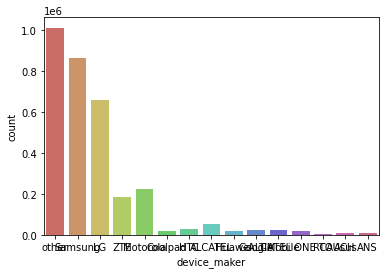

In [135]:
sns.countplot(x='device_maker', data=data, palette='hls')

<p style="line-height:1.75;font-size:16px">
Now these values are cleaner:

In [136]:
pd.unique(data.device_maker)

array(['other', 'Samsung', 'LG', 'ZTE', 'Motorola', 'Coolpad', 'HTC',
       'ALCATEL', 'Huawei', 'Google', 'T-Mobile', 'ALCATEL ONE TOUCH',
       'RCA', 'Asus', 'ANS'], dtype=object)

In [137]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['device_maker'])
data['device_maker'] = le.transform(data['device_maker'])

In [138]:
data

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,14,NaN,7.0,720,1280,chartboost,0
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,14,NaN,7.0,1280,720,chartboost,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,14,NaN,7.1.1,720,1280,chartboost,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,14,NaN,6.0.1,720,1280,chartboost,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,14,NaN,7.1.1,1024,768,chartboost,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3148823,a38d5eba-ad93-430e-8323-dd8ea0d713a2,1541472458853,com.altitude.rrsv,TX,T-Mobile USA,11,SM-J327T1,7.0,720,1280,chartboost,0
3148824,f4cb0a53-c02c-43a2-9d44-fcd79f18127e,1541472485093,com.slots.realvegas,GA,Mediacom Cable,14,NaN,8.1.0,1920,1080,chartboost,0
3148825,6c9a06ab-29ac-445d-b4e0-e7ebe66ce2b1,1541472516760,br.com.tapps.penguinevolution,MO,Sprint PCS,8,SP200,7.1.2,1280,720,chartboost,0
3148826,df975817-8218-4709-a9c0-e1d56c4a63b4,1541472552347,air.com.FDGEntertainment.Lonewolf.gp,WI,Spectrum,9,Moto G Plus (5th Gen.),7.0,1080,1920,chartboost,0


In [139]:
data.drop(['marketplace', 'device_model'], axis=1, inplace=True)

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148828 entries, 0 to 3148827
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   bidid          object
 1   utc_time       object
 2   app_id         object
 3   user_state     object
 4   user_isp       object
 5   device_maker   int64 
 6   device_osv     object
 7   device_height  object
 8   device_width   object
 9   click          object
dtypes: int64(1), object(9)
memory usage: 240.2+ MB


<p style="line-height:1.75;font-size:16px">
Drop duplicates of bidid:

In [146]:
data.sort_values(by=['bidid', 'click']).drop_duplicates(subset=['bidid'], keep='last')

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_osv,device_height,device_width,click
2233764,00000420-0c1b-4af0-b0ff-c0523df98066,1540494902787,com.casino.werewolfslots,CA,T-Mobile USA,8,7.0,720,1280,1
1447157,00000f76-1b64-4e47-b496-a5fbaac971c3,1536317677683,com.fiogonia.yatzy,IN,T-Mobile USA,14,7.0,1280,720,0
3055114,0000106f-295a-46c5-8c84-77a08c8b862e,1539549781120,com.toucangames.scary.clown.survival.hauntedgames,CA,Spectrum,8,7.0,720,1280,0
704011,00001b42-3048-4faa-8c51-933c3f99ad73,1540657569263,com.fun.crazy.supermarket.bakery.cashier,CA,Comcast Cable,1,6.0,480,854,0
1470444,000025f8-530c-4eef-9b55-7a423f0f37d0,1540417333590,com.newsbooks.home,CA,Spectrum Business,8,6.0,1280,720,0
...,...,...,...,...,...,...,...,...,...,...
1784136,ffffea51-71c2-4b55-90d5-ff79b1460571,1536294022010,air.com.ppllaayy.tfqsports,CO,Comcast Cable,14,8.0.0,720,1280,0
2906893,fffff076-3c42-4bfa-9d72-ed20d430b161,1536730538533,com.mobilityware.CrownSolitaire,AZ,Cox Communications,14,7.0,1280,720,1
2249182,fffff740-7d1b-4909-a458-52f326111135,1534489794342,com.absolute.bingo,CA,T-Mobile USA,14,7.0,720,1280,0
2514693,fffffc77-41f1-4608-a987-9b96e144a7a7,1540873475721,com.halfbrick.fruitninjafree,MA,T-Mobile USA,11,7.0,720,1280,0


<p style="line-height:1.75;font-size:16px">
Now we can drop the 'bidid' column since Index is also unique.<br>
Also we can reorder the columns 'device_height' and 'device_width' as one column named 'device_size':

In [ ]:
data['device_size'] = data['device_height'] * data['device_width']
data.drop(['bidid', 'device_height', 'device_width'], axis=1, inplace=True)

<p style="line-height:1.75;font-size:16px">
It seems after processing the 'utc_time' column as local time we can drop columns 'utc_time' and 'user_state'.<br>
Lets look a bit on column named 'user_isp':

In [ ]:
data.user_isp.value_counts(dropna=False)

In [ ]:
print(pd.unique(data.user_isp))
print(pd.unique(data.user_isp).sum())

In [ ]:
sns.countplot(x='user_isp', data=data, palette='hls')

<p style="line-height:1.75;font-size:16px">
As the "Tips" markdown says, we'll split the data for train/test by date:

In [147]:
!pwd

/home/ubuntu/notebooks/intro_to_ml/day_6


In [148]:
!aws s3 cp /home/ubuntu/notebooks/intro_to_ml/day_6/"Final Project-yhenig".ipynb s3://uatt-e2-yhenig/intro_to_ml/project1

upload: ./Final Project-yhenig.ipynb to s3://uatt-e2-yhenig/intro_to_ml/project1
